# Brain binary case

## Part 3 - discovering brain problem behaviour

Experiment objectives

By contrast to the well-known karate club problem, the brain problem needs to be scrutinized for maximum modularity scores results, which aren't fully clear, as we do not know the ground truth.

1. Start with louvain method to see what modularity scores to expect to refer to it later.
2. Run Advantage.
3. Compare both.


Glossary
- res. - resolution (abbr.)
- matrix resolution (gamma) - the input network hyperparameter determining the objective function of a given problem
- modularity resolution - modularity hyperparameter passed to the modularity score function
- modularity score (Q) - result of the modularity score function
- **referential modularity score (Q_max)** - highest modularity score value obtained. Not yet known, to determine as a main objective.

Constants
- For the purposes of this experiment and the following ones, we arbitrarily set the modularity resolution to 1.0. As it is constant, modularity scores can be compared against each other.

Let's start with a wide range of gammas and big number of runs (60 per value, 3600 overall).

### Experiment scope:
- matrix res. gamma in wide, wide range [0.01, 1.8], 60 values
- for each value run 60 times

In [9]:
GAMMA_LOWER_BOUND = 0.01
GAMMA_UPPER_BOUND = 1.8

In [25]:
import pandas as pd
from paths import BRAIN_PR_NAME, csv_path


# Id for data storage purposes
ID = 4

l = pd.read_csv(
    csv_path(id=ID, problem_name=BRAIN_PR_NAME, solver_name="louvain")
)

In [26]:
K = 2

n_all = l.shape[0]

n_groups = l.groupby(l.matrix_res).ngroups
n_in_group = l.groupby(l.matrix_res).matrix_res.value_counts().iloc[0]

print(
    f"Run for {n_groups} resolution param values, each value run {n_in_group} times."
)

Run for 50 resolution param values, each value run 1000 times.


In [27]:
l.k.value_counts()

k
4.0    16324
6.0    12245
7.0     9787
3.0     3194
1.0     3028
5.0     2947
8.0     1347
2.0     1122
9.0        6
Name: count, dtype: int64

In [28]:
# Only res. samples with 2 communities
l = l[l["k"] == K]

scores = l.mod_score
matrix_res = l.matrix_res

l_by_res = l.groupby(l.matrix_res, group_keys=True).agg(
    {"mod_score": ["mean", "std", "max", "min"]}
)

# Decimals precision
score_prec = 4
idx_prec = 2
l_by_res = l_by_res.round(score_prec)
l_by_res.index = l_by_res.index.to_series().round(idx_prec)

print(f"{l.shape[0]} results entries for {K} communities")
print(
    f"{l_by_res.shape[0]} different resolution value params for {K} communities"
)

1122 results entries for 2 communities
5 different resolution value params for 2 communities


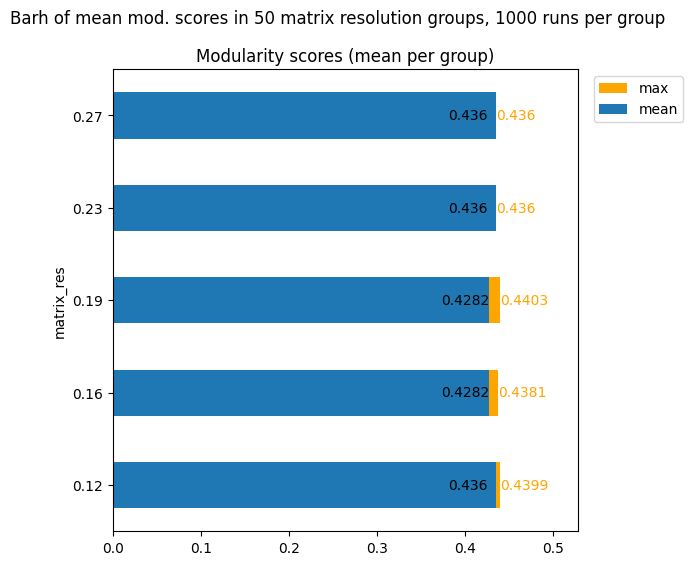

In [29]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(6, 6))
fig.suptitle(
    "Barh of mean mod. scores in "
    + f"{n_groups} matrix resolution groups, "
    + f"{n_in_group} runs per group"
)

l_max_barh = l_by_res.mod_score["max"].plot(ax=ax, kind="barh", color="orange")
ax.bar_label(ax.containers[-1], label_type="edge", color="orange")

l_mean_barh = l_by_res.mod_score["mean"].plot(ax=ax, kind="barh")
ax.bar_label(
    ax.containers[-1], label_type="edge", position=(-35, 0), color="black"
)

ax.margins(x=0.2)
ax.set_title("Modularity scores (mean per group)")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2);

- Louvain outputs exactly 2 communities for gamma in range [0.12, 0.27].
- The highest modularity score measured was **0.4403**. Let's set it as the referential louvain score value for now.

In [70]:
REF_MOD_SCORE = l_by_res.mod_score["max"].max()
REF_MOD_SCORE

0.4403

## Advantage

Let's do preliminary screening to get to know the proper gamma range for Advantage and the problem.

Note: Advantage takes significantly much more time than louvain, however in the brain problem it takes quite a lot. Examining 75 samples takes about 90 minutes, considerably more than for karate problem. That is why in each of the following experiments we could go either for a vide gamma range or for a significant number of runs per value, not the two at once, unfortunately.

### Exp 1
In this experiment we go for a wide gamma grid input range to take a general scan at lambda factor.

### Experiment scope:
- matrix res. gamma in wide range [0.4, 1.8], 15 values
- for each value run twice

In [58]:
GAMMA_LOWER_BOUND = 0.4
GAMMA_UPPER_BOUND = 1.8

In [100]:
import pandas as pd
from paths import csv_path, BRAIN_PR_NAME


# Id for data storage purposes
ID = 7

a = pd.read_csv(csv_path(id=ID, problem_name=BRAIN_PR_NAME, solver_name="adv"))

In [101]:
K = 2

n_all = a.shape[0]

n_groups = a.groupby(a.matrix_res).ngroups
n_in_group = a.groupby(a.matrix_res).matrix_res.value_counts().iloc[0]

print(
    f"Run for {n_groups} resolution param values, each value run {n_in_group} times."
)

Run for 15 resolution param values, each value run 2 times.


In [102]:
import numpy as np


# Only res. samples with 2 communities
print("All samples produced 2 communities: ", np.all(a == a[a["k"] == K]))

a_scores = a.mod_score
a_matrix_res = a.matrix_res

# Group by matrix resolution
# Measure mean and max values
# for each matrix res. input
a_by_res = a.groupby(a.matrix_res, group_keys=True).agg(
    {"mod_score": ["mean", "std", "max", "min"]}
)

# Decimals precision
score_prec = 4
idx_prec = 2
a_by_res = a_by_res.round(score_prec)
a_by_res.index = a_by_res.index.to_series().round(idx_prec)

print(f"{a.shape[0]} results entries")
print(f"{a_by_res.shape[0]} resolution value params")

All samples produced 2 communities:  True
30 results entries
15 resolution value params


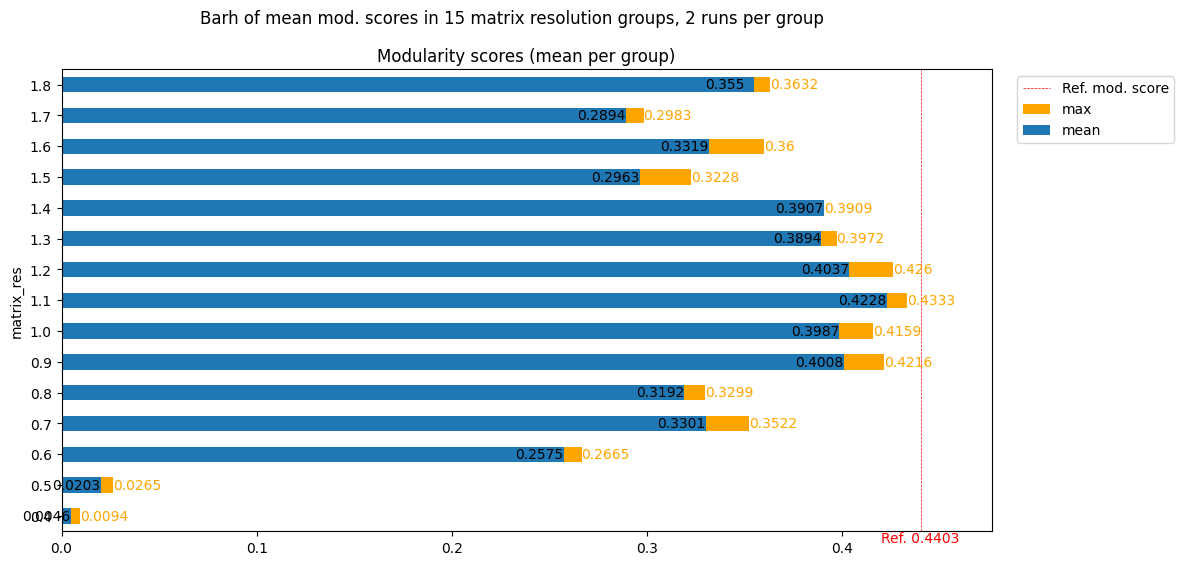

In [104]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle(
    "Barh of mean mod. scores in "
    + f"{n_groups} matrix resolution groups, "
    + f"{n_in_group} runs per group"
)

a_max_barh = a_by_res.mod_score["max"].plot(ax=ax, kind="barh", color="orange")
ax.bar_label(ax.containers[-1], label_type="edge", color="orange")

a_mean_barh = a_by_res.mod_score["mean"].plot(ax=ax, kind="barh")
ax.bar_label(
    ax.containers[-1], label_type="edge", position=(-35, 0), color="black"
)

ax.margins(x=0.1)
ax.set_title("Modularity scores (mean per group)")

ax.axvline(
    x=REF_MOD_SCORE,
    linestyle="dashed",
    color="red",
    linewidth=0.5,
    label="Ref. mod. score",
)

ax.annotate(
    "Ref. " + str(REF_MOD_SCORE),
    xy=(REF_MOD_SCORE, 0),
    xytext=(REF_MOD_SCORE, 0),
    textcoords=plt.gca().get_xaxis_transform(),
    va="top",
    ha="center",
    color="red",
)

ax.legend(bbox_to_anchor=(1.02, 1), loc=2);

- With as little as 2 runs per gamma value (Advantage had less "opportunities" to obtain the best results), sensible results where obtained within range of [0.9, 1.4] with mean mod. score >= 0.39.
- These results are not binding due to fact that each problem instance (with a given gamma) was run only twice.
- However, the solid conclusion is that Advantage and louvain have different gamma input ranges to deliver binary case solution.
- Advantage came close to the referential vaue with max. mod. score 0.4333 for gamma = 1.1, even for only 2 runs.

### Advantage - narrowing down the gamma range
### Exp. 2
Now let's go for qualtiy over quantity - to measure mod. scores frequencies.
### Experiment scope:
- matrix res. gamma in range [0.8, 1.4], 5 values
- for each value run 20 times

In [106]:
GAMMA_LOWER_BOUND = 0.8
GAMMA_UPPER_BOUND = 1.4

In [112]:
import pandas as pd
from paths import csv_path, BRAIN_PR_NAME


# Id for data storage purposes
ID = 9

a = pd.read_csv(csv_path(id=ID, problem_name=BRAIN_PR_NAME, solver_name="adv"))

In [113]:
K = 2

n_all = a.shape[0]

n_groups = a.groupby(a.matrix_res).ngroups
n_in_group = a.groupby(a.matrix_res).matrix_res.value_counts().iloc[0]

print(
    f"Run for {n_groups} resolution param values, each value run {n_in_group} times."
)

Run for 5 resolution param values, each value run 20 times.


In [114]:
import numpy as np


# Only res. samples with 2 communities
print("All samples produced 2 communities: ", np.all(a == a[a["k"] == K]))

a_scores = a.mod_score
a_matrix_res = a.matrix_res

# Group by matrix resolution
# Measure mean and max values
# for each matrix res. input
a_by_res = a.groupby(a.matrix_res, group_keys=True).agg(
    {"mod_score": ["mean", "std", "max", "min"]}
)

# Decimals precision
score_prec = 4
idx_prec = 2
a_by_res = a_by_res.round(score_prec)
a_by_res.index = a_by_res.index.to_series().round(idx_prec)

print(f"{a.shape[0]} results entries")
print(f"{a_by_res.shape[0]} resolution value params")

All samples produced 2 communities:  True
100 results entries
5 resolution value params


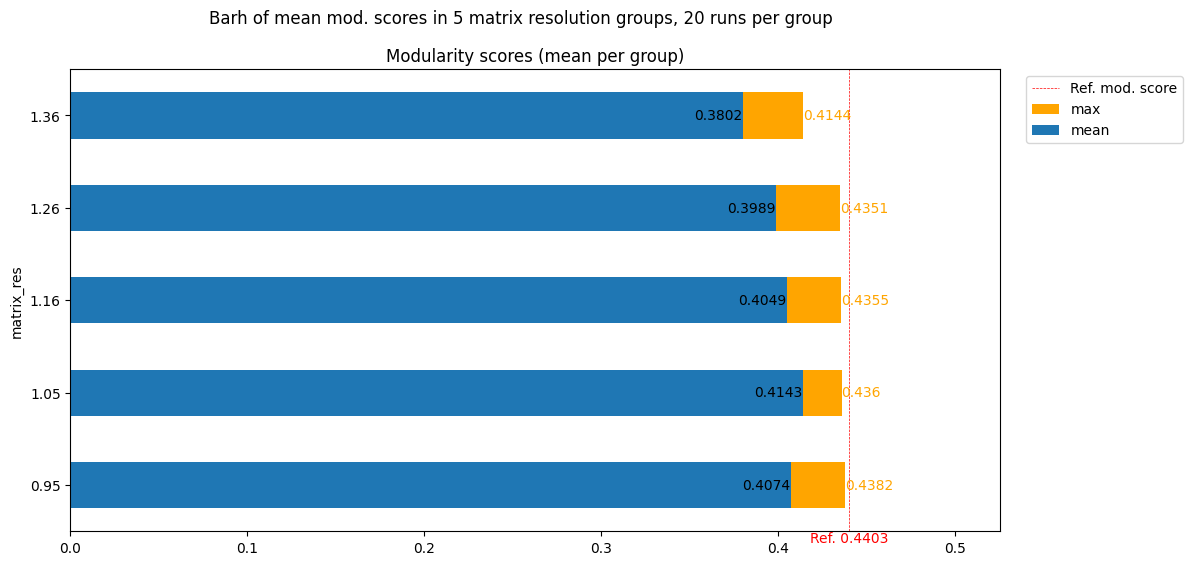

In [116]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle(
    "Barh of mean mod. scores in "
    + f"{n_groups} matrix resolution groups, "
    + f"{n_in_group} runs per group"
)

a_max_barh = a_by_res.mod_score["max"].plot(ax=ax, kind="barh", color="orange")
ax.bar_label(ax.containers[-1], label_type="edge", color="orange")

a_mean_barh = a_by_res.mod_score["mean"].plot(ax=ax, kind="barh")
ax.bar_label(
    ax.containers[-1], label_type="edge", position=(-35, 0), color="black"
)

ax.margins(x=0.2)
ax.set_title("Modularity scores (mean per group)")

ax.axvline(
    x=REF_MOD_SCORE,
    linestyle="dashed",
    color="red",
    linewidth=0.5,
    label="Ref. mod. score",
)

ax.annotate(
    "Ref. " + str(REF_MOD_SCORE),
    xy=(REF_MOD_SCORE, 0),
    xytext=(REF_MOD_SCORE, 0),
    textcoords=plt.gca().get_xaxis_transform(),
    va="top",
    ha="center",
    color="red",
)

ax.legend(bbox_to_anchor=(1.02, 1), loc=2);

- The best mean score, 0.4143, was for gamma = 1.05.
- **The best maximum score, 0.4382**, was quite close to the referential value of 0.4403.

index min: 0.95
index max: 1.36
mean mod. score min: 0.3802
mean mod. score max: 0.4143


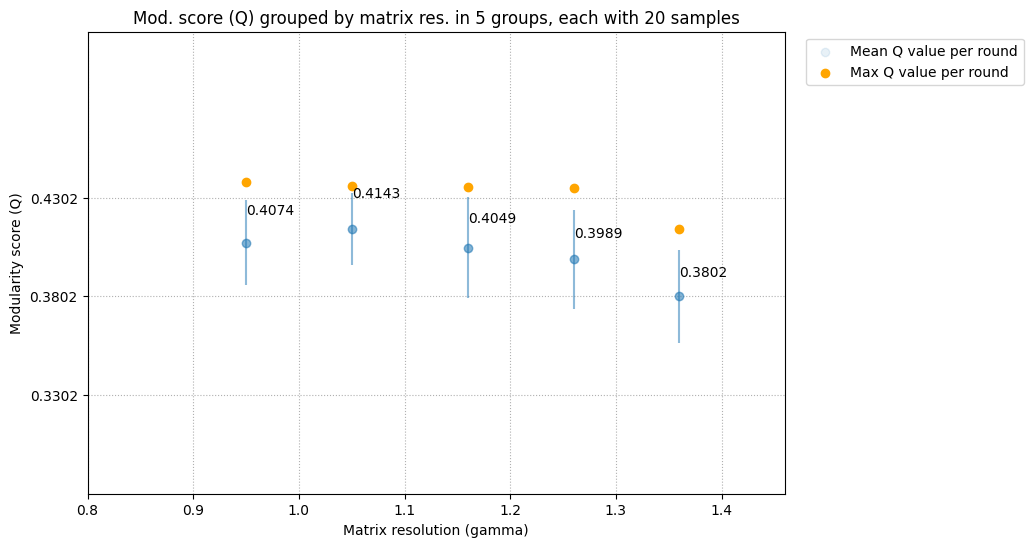

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


a_x_min = a_by_res.index.min()
a_x_max = a_by_res.index.max()
a_score_mean_min = a_by_res.mod_score["mean"].min()
a_score_mean_max = a_by_res.mod_score["mean"].max()

print(f"index min: {a_x_min}")
print(f"index max: {a_x_max}")
print(f"mean mod. score min: {a_score_mean_min}")
print(f"mean mod. score max: {a_score_mean_max}")


plt.rcParams["figure.figsize"] = (9, 6)

x_major_ticker = mpl.ticker.MultipleLocator(5)
x_minor_ticker = mpl.ticker.MultipleLocator(1)


fig, axes = plt.subplots()

axes.xaxis.set_major_locator(x_major_ticker)
axes.xaxis.set_minor_locator(x_minor_ticker)

axes.set_title(
    f"Mod. score (Q) grouped by matrix res. in {n_groups} groups,"
    + f" each with {n_in_group} samples"
)
axes.set_xlabel("Matrix resolution (gamma)")
axes.set_ylabel("Modularity score (Q)")

axes.grid(which="major", linestyle=":")

x_margin = 0.1
axes.set_xlim(a_x_min - x_margin, a_x_max + x_margin)
axes.set_xticks(
    np.arange(GAMMA_LOWER_BOUND, GAMMA_UPPER_BOUND + x_margin / 2, x_margin)
)
y_margin = 0.1
axes.set_ylim(a_score_mean_min - y_margin, a_score_mean_max + y_margin)
axes.set_yticks(
    np.arange(
        a_score_mean_min - y_margin / 2,
        a_score_mean_max + y_margin / 2,
        step=y_margin / 2,
    )
)

axes.scatter(
    a_by_res.mod_score.index,
    a_by_res.mod_score["mean"],
    label="Mean Q value per round",
    alpha=0.1,
)
axes.scatter(
    a_by_res.mod_score.index,
    a_by_res.mod_score["max"],
    c="orange",
    label="Max Q value per round",
)
axes.errorbar(
    a_by_res.mod_score.index,
    a_by_res.mod_score["mean"],
    yerr=a_by_res.mod_score["std"],
    fmt="o",
    alpha=0.5,
)

x_offsets = [
    0.0009 * (-1) ** (i + 1) if y > 0.425 else 0
    for i, (x, y) in enumerate(zip(a_by_res.index, a_by_res.mod_score["mean"]))
]

d = {
    k: v for k, v in enumerate(zip(a_by_res.index, a_by_res.mod_score["mean"]))
}
d_sorted = dict(sorted(d.items(), key=lambda item: item[1][1]))
y_offsets = [0.1 if x > 0.41 else -0.03 for x in a_by_res.mod_score["mean"]]

off = 0.01
for i, t in enumerate(list(d_sorted.items())):
    _, (k, v) = t
    axes.annotate(
        text=f"{v:.4f}", xy=(k + x_offsets[i], v + off), color="black"
    )
    off *= 1.13

axes.legend(bbox_to_anchor=(1.02, 1), loc=2);

### Advantage
### Exp 3.
Let's focus on the frequency even more, while narrowing down the gamma input range.

### Experiment scope:
- matrix res. gamma in narrow range [0.95, 1.26], 4 values
- for each value run 30 times

In [124]:
GAMMA_LOWER_BOUND = 0.95
GAMMA_UPPER_BOUND = 1.26

In [125]:
import pandas as pd
from paths import csv_path, BRAIN_PR_NAME


# Id for data storage purposes
ID = 10

a = pd.read_csv(csv_path(id=ID, problem_name=BRAIN_PR_NAME, solver_name="adv"))

In [126]:
K = 2

n_all = a.shape[0]

n_groups = a.groupby(a.matrix_res).ngroups
n_in_group = a.groupby(a.matrix_res).matrix_res.value_counts().iloc[0]

print(
    f"Run for {n_groups} resolution param values, each value run {n_in_group} times."
)

Run for 4 resolution param values, each value run 30 times.


In [127]:
import numpy as np


# Only res. samples with 2 communities
print("All samples produced 2 communities: ", np.all(a == a[a["k"] == K]))

a_scores = a.mod_score
a_matrix_res = a.matrix_res

# Group by matrix resolution
# Measure mean and max values
# for each matrix res. input
a_by_res = a.groupby(a.matrix_res, group_keys=True).agg(
    {"mod_score": ["mean", "std", "max", "min"]}
)

# Decimals precision
score_prec = 4
idx_prec = 2
a_by_res = a_by_res.round(score_prec)
a_by_res.index = a_by_res.index.to_series().round(idx_prec)

print(f"{a.shape[0]} results entries")
print(f"{a_by_res.shape[0]} resolution value params")

All samples produced 2 communities:  True
120 results entries
4 resolution value params


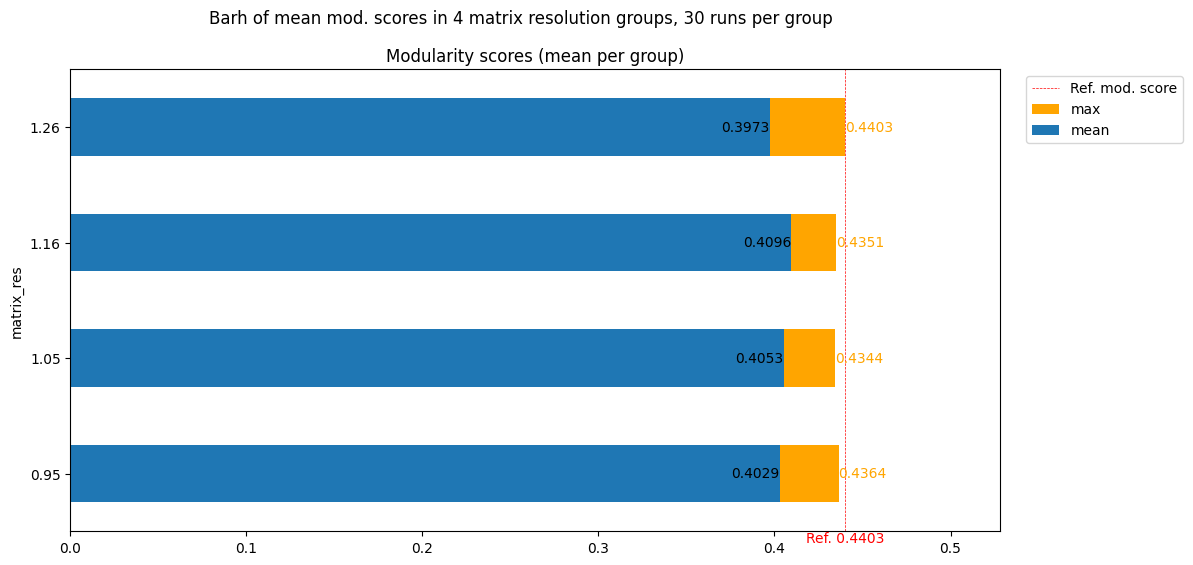

In [128]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle(
    "Barh of mean mod. scores in "
    + f"{n_groups} matrix resolution groups, "
    + f"{n_in_group} runs per group"
)

a_max_barh = a_by_res.mod_score["max"].plot(ax=ax, kind="barh", color="orange")
ax.bar_label(ax.containers[-1], label_type="edge", color="orange")

a_mean_barh = a_by_res.mod_score["mean"].plot(ax=ax, kind="barh")
ax.bar_label(
    ax.containers[-1], label_type="edge", position=(-35, 0), color="black"
)

ax.margins(x=0.2)
ax.set_title("Modularity scores (mean per group)")

ax.axvline(
    x=REF_MOD_SCORE,
    linestyle="dashed",
    color="red",
    linewidth=0.5,
    label="Ref. mod. score",
)

ax.annotate(
    "Ref. " + str(REF_MOD_SCORE),
    xy=(REF_MOD_SCORE, 0),
    xytext=(REF_MOD_SCORE, 0),
    textcoords=plt.gca().get_xaxis_transform(),
    va="top",
    ha="center",
    color="red",
)

ax.legend(bbox_to_anchor=(1.02, 1), loc=2);

- We are suprised with wonderful news of **Advantage obtaining the same value as our referential 0.4403 louvain score**! However, it happened in the measurement class of gamma = 1.26, where the mean modularity score is the lowest among all the other samples from this exp.

## What is the the highest modularity score (0.4403) frequency?

In [129]:
# Class (gamma groupby class)
# with highest max score
highest_score_class = a_by_res.loc[
    a_by_res["mod_score"]["max"] == a_by_res["mod_score"]["max"].max()
]
highest_score_idx = highest_score_class.index
highest_score_class

mod_score                        
                mean     std     max     min
matrix_res                                  
1.26          0.3973  0.0223  0.4403  0.3583

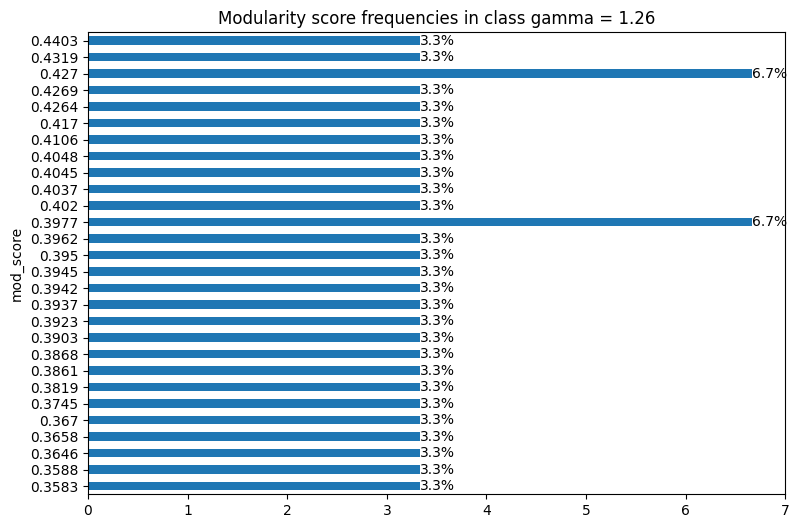

In [142]:
score_counts = (
    a[a.matrix_res.round(2) == highest_score_idx.values[0]]
    .mod_score.round(4)
    .value_counts()
)
score_frequencies = score_counts / score_counts.sum() * 100

ax = score_frequencies.sort_index().plot(
    kind="barh",
    title="Modularity score frequencies "
    + f"in class gamma = {highest_score_idx.values[0]}",
)
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%")

- The referential result of 0.4403 was achieved only for 1 if 30 samples.

## Remarks after part 3

- Advantage is able to achieve the referential louvain mod. score for the brain problem, however
- its results are quite noisy and labile.